# **THE SPARKS FOUNDATION**

DATA SCIENCE AND BUSINESS ANALYTICS INTERN

**PREDICTION USING UNSUPERVISED LEARNING**

Task 2 -From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

BY- Sneha Goyal

In [ ]:
#importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DATA COLLECTION

In [ ]:
df=pd.read_csv("/content/Iris.xls")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.shape 

(150, 5)

150 rows and 5 columns.

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# DATA PREPROCESSING

In [ ]:
iris.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


No missing value.

In [ ]:
iris=df.drop(['Species'],axis=1) #dropping column named as Species
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [ ]:
iris.describe() #various statistical measure 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
X=iris.iloc[:,1:5] 

In [ ]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#K-MEANS CLUSTERING

To find optimum number of clusters.

In [ ]:
from sklearn.cluster import KMeans

**ELBOW METHOD**

In [ ]:
wcss=[] #within cluster sum of squares
for i in range(1,11): #iteration over number of clusters
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=50)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

We need to minimize the wcss.

In [ ]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 39.197082928891625,
 34.318753220611924,
 29.906856755965457,
 28.090211734320434,
 25.919589846428085]

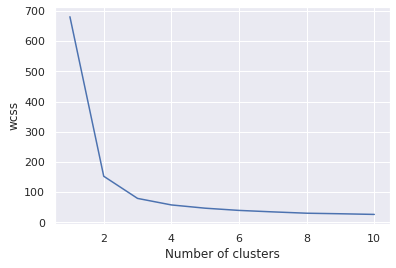

In [ ]:
import seaborn as sns
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

The optimal number if clusters is when the elbow occurs, where the wcss does not changes significantly.
In our case that is at 3rd iteration so optimum number of clusters is 3.

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=52)

In [ ]:
y=kmeans.fit_predict(X)

In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Here, 0 represents 1st cluster.
1  represents 2nd cluster.
2 represents 3rd cluster.

#DATA VISUALIZATION

In [ ]:
X=X.values

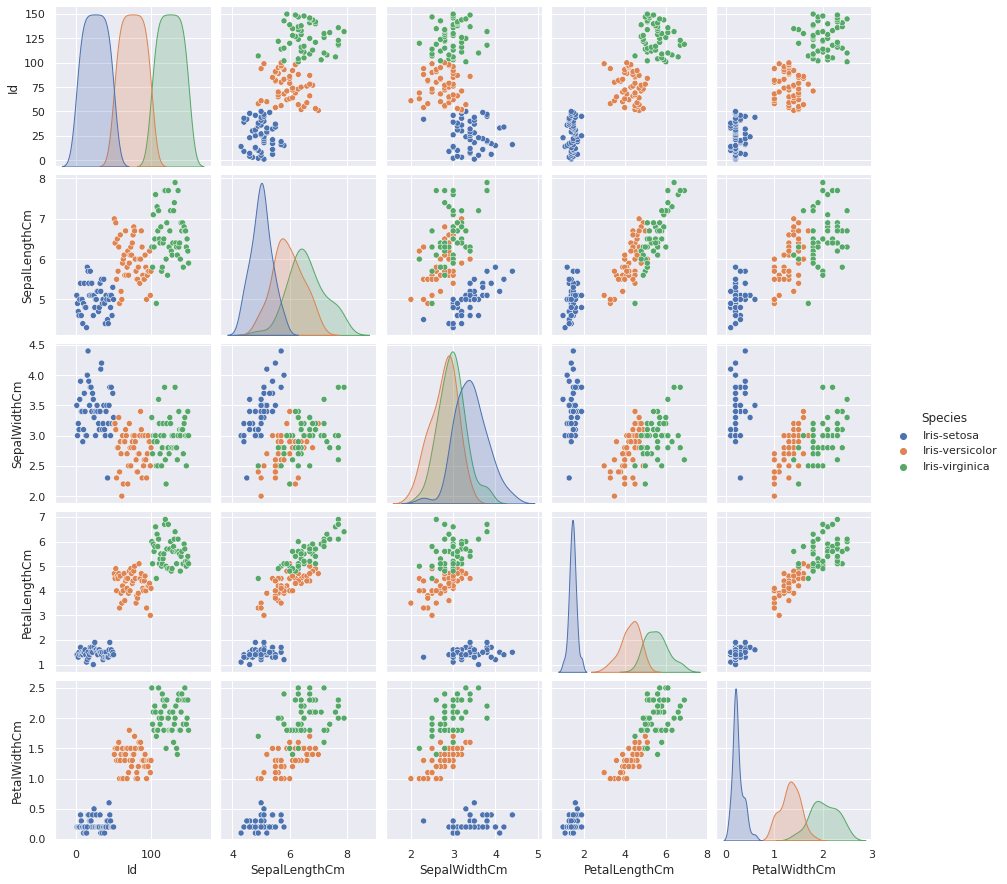

In [ ]:
import seaborn as sns
sns.pairplot(data=df,hue='Species')

Petal Length and Petal width can be used for classification .

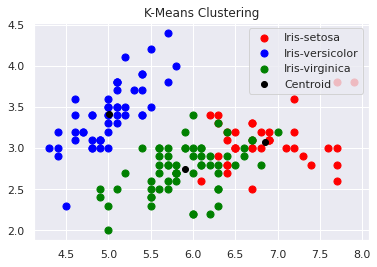

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1],s=50,color='red',label='Iris-setosa')
plt.scatter(X[y==1,0],X[y==1,1],s=50,color='blue',label='Iris-versicolor')
plt.scatter(X[y==2,0],X[y==2,1],s=50,color='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',label='Centroid')
plt.legend()
plt.title('K-Means Clustering')
plt.show()

We have classified our data into 3 clusters.

**THANKYOU**